# **Deep Learning With Python  -  CHAPTER 3**

- This code provides a structured and modular approach to processing, training, and evaluating machine learning models for three different datasets: **IMDB (sentiment analysis), Reuters (news classification), and Boston Housing (regression analysis)**.

- The `DataLoader` class handles loading datasets, while the `Preprocessor` class processes the data, including text vectorization, one-hot encoding, and normalization.

- The `TextModel` class builds deep learning models for text classification, and the `RegressionModel` class constructs a regression model for housing price prediction. The `Trainer` class manages the training process, and the `Evaluator` class evaluates model performance.

- Finally, the `Plotter` class visualizes training results. This structured implementation ensures **readability, modularity, and scalability**, allowing easy adaptation for future tasks. 🚀

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb, reuters, boston_housing

In [2]:
class DataLoader:
    @staticmethod
    def load_imdb():
        (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
        return train_data, train_labels, test_data, test_labels

    @staticmethod
    def load_reuters():
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
        return train_data, train_labels, test_data, test_labels

    @staticmethod
    def load_boston_housing():
        (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
        return train_data, train_targets, test_data, test_targets

In [3]:
class Preprocessor:
    @staticmethod
    def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.0
        return results

    @staticmethod
    def to_one_hot(labels, dimension=46):
        return keras.utils.to_categorical(labels, num_classes=dimension)

    @staticmethod
    def normalize_data(train_data, test_data):
        mean = train_data.mean(axis=0)
        std = train_data.std(axis=0)
        train_data = (train_data - mean) / std
        test_data = (test_data - mean) / std
        return train_data, test_data

In [4]:
class TextModel:
    def __init__(self, output_dim, loss_function):
        self.model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(output_dim, activation="softmax" if output_dim > 1 else "sigmoid")
        ])
        self.model.compile(optimizer="rmsprop", loss=loss_function, metrics=["accuracy"])

    def get_model(self):
        return self.model

In [5]:
class RegressionModel:
    @staticmethod
    def build_model():
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1)
        ])
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        return model

In [6]:
class Trainer:
    def __init__(self, model, train_data, train_labels, val_data=None, val_labels=None):
        self.model = model
        self.train_data = train_data
        self.train_labels = train_labels
        self.val_data = val_data
        self.val_labels = val_labels

    def train(self, epochs=20, batch_size=512):
        history = self.model.fit(
            self.train_data, self.train_labels,
            epochs=epochs, batch_size=batch_size,
            validation_data=(self.val_data, self.val_labels) if self.val_data is not None else None
        )
        return history.history

In [7]:
class Evaluator:
    @staticmethod
    def evaluate(model, test_data, test_labels):
        results = model.evaluate(test_data, test_labels)
        print(f"Test results: {results}")
        return results

    @staticmethod
    def predict(model, test_data):
        predictions = model.predict(test_data)
        return predictions

In [8]:
class Plotter:
    @staticmethod
    def plot_loss(history):
        epochs = range(1, len(history["loss"]) + 1)
        plt.plot(epochs, history["loss"], "bo", label="Training loss")
        plt.plot(epochs, history["val_loss"], "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    @staticmethod
    def plot_accuracy(history):
        epochs = range(1, len(history["accuracy"]) + 1)
        plt.plot(epochs, history["accuracy"], "bo", label="Training accuracy")
        plt.plot(epochs, history["val_accuracy"], "b", label="Validation accuracy")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

In [9]:
train_data, train_labels, test_data, test_labels = DataLoader.load_imdb()
x_train = Preprocessor.vectorize_sequences(train_data)
x_test = Preprocessor.vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.6912 - loss: 0.5756 - val_accuracy: 0.8743 - val_loss: 0.3353
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8760 - loss: 0.3153 - val_accuracy: 0.8858 - val_loss: 0.2867
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9208 - loss: 0.2163 - val_accuracy: 0.8753 - val_loss: 0.3090
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9312 - loss: 0.1820 - val_accuracy: 0.8863 - val_loss: 0.2801
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8782 - loss: 0.2958
Test results: [0.2950899302959442, 0.8807600140571594]


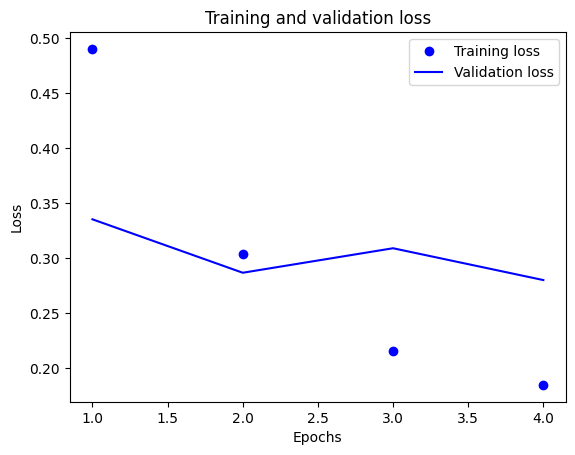

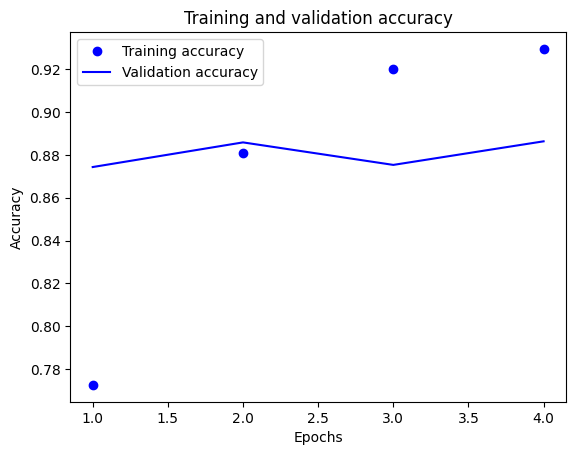

In [10]:
imdb_model = TextModel(output_dim=1, loss_function="binary_crossentropy").get_model()
trainer = Trainer(imdb_model, x_train[10000:], y_train[10000:], x_train[:10000], y_train[:10000])
history = trainer.train(epochs=4)
Evaluator.evaluate(imdb_model, x_test, y_test)
Plotter.plot_loss(history)
Plotter.plot_accuracy(history)

In [11]:
train_data, train_labels, test_data, test_labels = DataLoader.load_reuters()
x_train = Preprocessor.vectorize_sequences(train_data)
x_test = Preprocessor.vectorize_sequences(test_data)
y_train = Preprocessor.to_one_hot(train_labels)
y_test = Preprocessor.to_one_hot(test_labels)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
reuters_model = TextModel(output_dim=46, loss_function="categorical_crossentropy").get_model()
trainer = Trainer(reuters_model, x_train[1000:], y_train[1000:], x_train[:1000], y_train[:1000])
history = trainer.train(epochs=9)
Evaluator.evaluate(reuters_model, x_test, y_test)
Plotter.plot_loss(history)
Plotter.plot_accuracy(history)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.4221
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0015 - loss: 0.4141     
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0160 - loss: 0.4143 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0436 - loss: 0.4059 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0819 - loss: 0.4063 


{'accuracy': [0.0,
  0.005499999970197678,
  0.023000000044703484,
  0.05299999937415123,
  0.09549999982118607],
 'loss': [0.4100000262260437,
  0.4100000560283661,
  0.4100000262260437,
  0.4100000262260437,
  0.4099999964237213]}

In [30]:
train_data, train_targets, test_data, test_targets = DataLoader.load_boston_housing()
train_data, test_data = Preprocessor.normalize_data(train_data, test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.1000107  0.09996241 0.10000938 0.0999283  0.10001905 0.10000356
  0.10000276 0.09998804 0.10000961 0.10006621]
 [0.10003782 0.09996597 0.10001119 0.09988645 0.10002056 0.09999523
  0.10001875 0.09997721 0.10000805 0.10007863]
 [0.09991915 0.09983701 0.09998801 0.09990538 0.10010196 0.10003131
  0.10000634 0.09996994 0.1000315  0.10020938]
 [0.10004576 0.10001397 0.09998065 0.09997207 0.09997971 0.09999125
  0.10003085 0.09999443 0.09998326 0.10000804]
 [0.10000481 0.09998628 0.10000978 0.09996288 0.10000216 0.10000296
  0.09999863 0.09999463 0.10000475 0.10003313]
 [0.1000381  0.09997925 0.10001086 0.09990038 0.10001059 0.09999306
  0.10002163 0.09997994 0.10000379 0.10006239]
 [0.09996268 0.09989918 0.10000227 0.09991836 0.10005994 0.10001741
  0.10000227 0.09997996 0.10002375 0.10013416]
 [0.10006416 0.09995746 0.09992626 0.09993764 0.10002715 0.09998544
  0.10006765 0.09998814 0.09997857 0.10006754]
 [0.10002873 0.09993526 0.10000929 0.0998